# Importing

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib

In [2]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
data=pd.read_csv(url)
data.head()
#data.shape

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


- I want to understand any factors that might affect average earnings(Median).

# Cleaning & Organizing

In [3]:
#data.describe()
data.dtypes
list(data)

['Rank',
 'Major_code',
 'Major',
 'Total',
 'Men',
 'Women',
 'Major_category',
 'ShareWomen',
 'Sample_size',
 'Employed',
 'Full_time',
 'Part_time',
 'Full_time_year_round',
 'Unemployed',
 'Unemployment_rate',
 'Median',
 'P25th',
 'P75th',
 'College_jobs',
 'Non_college_jobs',
 'Low_wage_jobs']

In [4]:
data2 = data.drop([21],axis = 0)
data2[['Median', 'ShareWomen','Low_wage_jobs']] = data[['Median','ShareWomen','Low_wage_jobs']].astype(float)
data2.rename(columns={'Unemployment_rate':'UnemploymentRate','Non_college_jobs':'NonCJobs','Low_wage_jobs':'LowWage'}, inplace = True)
#data2['ShareWomen']= data2['ShareWomen']*100
#data2.dtypes
data3 = data2.drop(columns = ['Major_code'])
data3.head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,UnemploymentRate,Median,P25th,P75th,College_jobs,NonCJobs,LowWage
0,1,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000.0,95000,125000,1534,364,193.0
1,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000.0,55000,90000,350,257,50.0
2,3,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000.0,50000,105000,456,176,0.0
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000.0,43000,80000,529,102,0.0
4,5,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000.0,50000,75000,18314,4440,972.0


# Graphing

- Generate at least 3 graphs, whatever you like or are curious about, to explore your ideas
- Give brief explanations for why you include the graphs you did and what you’ve learned.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c198d3898>]],
      dtype=object)

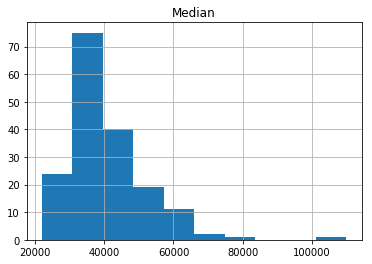

In [5]:
data.hist('Median')

- Average Median will be around 40000.

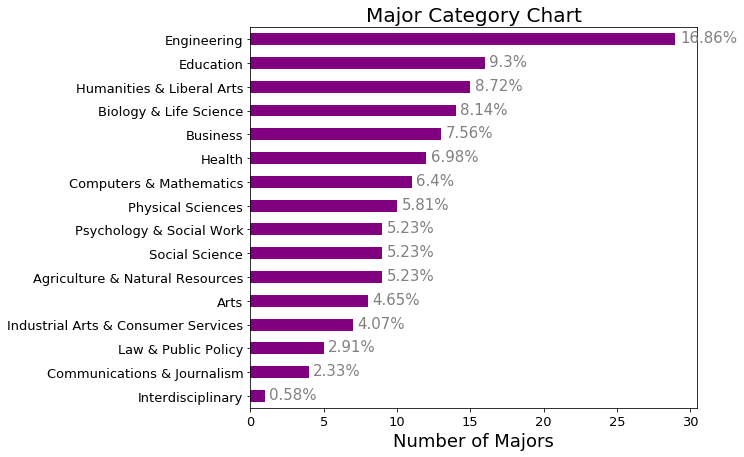

In [6]:
data4 = data3['Major_category'].value_counts()
#data4.plot.barh()
ax = data4.plot(kind='barh', figsize=(8,7), color="purple", fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Major Category Chart", fontsize=20)
ax.set_xlabel("Number of Majors", fontsize=18);
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
# create a list to collect the plt.patches data
totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
str(round((i.get_width()/total)*100,2))+'%', fontsize=15,
color='grey')
# invert for largest on top
ax.invert_yaxis()

- Bar graph is suitable when dealing with categorical data. Number of majors in the categories are within 20 except engineering.

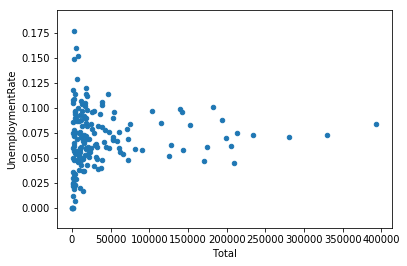

In [7]:
data3.plot.scatter('Total','UnemploymentRate')

- No clear relationship between class size and unemployment rate

# Analyzing
- Identify at least 3 trends or patterns you think are interesting by manipulating the table.

In [8]:
datae = data3.loc[data3['Major_category'] == 'Engineering']
datae.describe()

,Rank,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,UnemploymentRate,Median,P25th,P75th,College_jobs,NonCJobs,LowWage
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,22.620690,18537.344828,14079.551724,4457.793103,0.238889,169.862069,14495.586207,13167.827586,2935.724138,9963.862069,1028.172414,0.063334,57382.758621,41555.172414,70448.275862,9302.310345,3530.448276,864.793103
std,18.640229,25231.657274,20413.370507,5788.262905,0.101771,240.169245,19947.570356,18221.877254,3919.031357,13932.153015,1416.339953,0.034998,13626.079747,12553.132398,16938.093599,13820.546496,4473.251866,1198.416824
min,1.000000,720.000000,488.000000,77.000000,0.077453,3.000000,604.000000,524.000000,126.000000,340.000000,16.000000,0.006334,40000.000000,25000.000000,50000.000000,350.000000,50.000000,0.000000
25%,10.000000,2906.000000,2200.000000,506.000000,0.153037,26.000000,2449.000000,2038.000000,343.000000,1449.000000,78.000000,0.042876,50000.000000,35000.000000,60000.000000,1394.000000,649.000000,142.000000
50%,17.000000,4790.000000,4419.000000,1385.000000,0.227118,71.000000,4428.000000,4175.000000,1040.000000,3413.000000,400.000000,0.059824,57000.000000,40000.000000,67000.000000,2446.000000,2121.000000,372.000000
75%,31.000000,18968.000000,12953.000000,6548.000000,0.322222,183.000000,15604.000000,14879.000000,2724.000000,11326.000000,1019.000000,0.075038,60000.000000,45000.000000,75000.000000,8306.000000,3896.000000,789.000000
max,67.000000,91227.000000,80320.000000,20957.000000,0.451465,1029.000000,76442.000000,71298.000000,13101.000000,54639.000000,4650.000000,0.177226,110000.000000,95000.000000,125000.000000,52844.000000,16384.000000,4221.000000


In [9]:
data3.describe()

,Rank,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,UnemploymentRate,Median,P25th,P75th,College_jobs,NonCJobs,LowWage
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


- Mean value for median earnings of engineering majors was higher compare to the whole data.

In [10]:
data3['SharePercentile'] = pd.qcut(data3['ShareWomen'],100,labels=False,
                                   duplicates = 'drop')
#data3['UnempRatePercentile'] = pd.qcut(data3['UnemploymentRate'],100,labels=False,duplicates = 'drop')
data3.head()
data3.sort_values('SharePercentile',ascending=False).head() 
data3.sort_values('SharePercentile',ascending=True).head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,UnemploymentRate,Median,P25th,P75th,College_jobs,NonCJobs,LowWage,SharePercentile
73,74,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,111,...,111,0,0.000000,40000.0,40000,40000,0,0,0.0,0
66,67,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4790.0,4419.0,371.0,Engineering,0.077453,71,4186,4175,...,3607,250,0.056357,40000.0,27000,52000,1861,2121,406.0,0
1,2,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,...,388,85,0.117241,75000.0,55000,90000,350,257,50.0,1
26,27,CONSTRUCTION SERVICES,18498.0,16820.0,1678.0,Industrial Arts & Consumer Services,0.090713,295,16318,15690,...,12313,1042,0.060023,50000.0,36000,60000,3275,5351,703.0,1
3,4,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,...,692,40,0.050125,70000.0,43000,80000,529,102,0.0,2


- Health and Education majors have the highest ShareWomen percentile, while Engineering and Military tech major have the lowest. Highest percentile has value around 0.97 and the lowest percentiles have value around 0-0.08

In [11]:
data3.sort_values('Total',ascending=False).head()

,Rank,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,...,Full_time_year_round,Unemployed,UnemploymentRate,Median,P25th,P75th,College_jobs,NonCJobs,LowWage,SharePercentile
145,146,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,233205,...,174438,28169,0.083811,31500.0,24000,41000,125148,141860,48207.0,87
76,77,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,251540,...,199897,21502,0.072218,38000.0,29000,50000,36720,148395,32395.0,41
123,124,BIOLOGY,280709.0,111762.0,168947.0,Biology & Life Science,0.601858,1370,182295,144512,...,100336,13874,0.070725,33400.0,24000,45000,88232,81109,28339.0,59
57,58,GENERAL BUSINESS,234590.0,132238.0,102352.0,Business,0.436302,2380,190183,171385,...,138299,14946,0.072861,40000.0,30000,55000,29334,100831,27320.0,36
93,94,COMMUNICATIONS,213996.0,70619.0,143377.0,Communications & Journalism,0.669999,2394,179633,147335,...,116251,14602,0.075177,35000.0,27000,45000,40763,97964,27440.0,68


- Psychology and Business major have the largest class size.

# Hypothesis formation

## Write out your regression model as an equation, with "ladder" as the DV.

Median = aShareWomen + bCollegeJobs + c

## What are your IVs, and why? What do you expect to find?

IV = ShareWomen and Non College Jobs. I saw a tweet that says gender ratio affect the earnings
of an industry. I expect negative ’a’. Also, people say college degree payoffs. Thus, I expect
positive ’b’

## Formally write your null and alternative hypotheses.

- H1 = There is positive relationship between College Jobs and Meidan; negative relationship between sharewomen and median.
- H0 = There is no relationship between Median, share women, and non college jobs.

# Regression

In [12]:
X = data3[['ShareWomen','College_jobs']]
Y = data3['Median']
X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Median   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     53.68
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           8.97e-19
Time:                        21:19:03   Log-Likelihood:                -1808.9
No. Observations:                 172   AIC:                             3624.
Df Residuals:                     169   BIC:                             3633.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.597e+04   1705.051     32.827   

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
results = smf.ols('Median ~ ShareWomen', data=data3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Median   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     105.4
Date:                Wed, 05 Jun 2019   Prob (F-statistic):           1.51e-19
Time:                        21:19:03   Log-Likelihood:                -1809.7
No. Observations:                 172   AIC:                             3623.
Df Residuals:                     170   BIC:                             3630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.609e+04   1705.115     32.897      0.000    5.27e+04    5.95e+04
ShareWomen -3.067e+04   2987.010    -10.268      0.000   -3.66e+04   -2.48e+04
==============================================================================
Omnibus:                       92.256   Durbin-Watson:                   0.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              659.444
Skew:                           1.851   Prob(JB):                    6.36e-144
Kurtosis:                      11.850   Cond. No.                         5.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

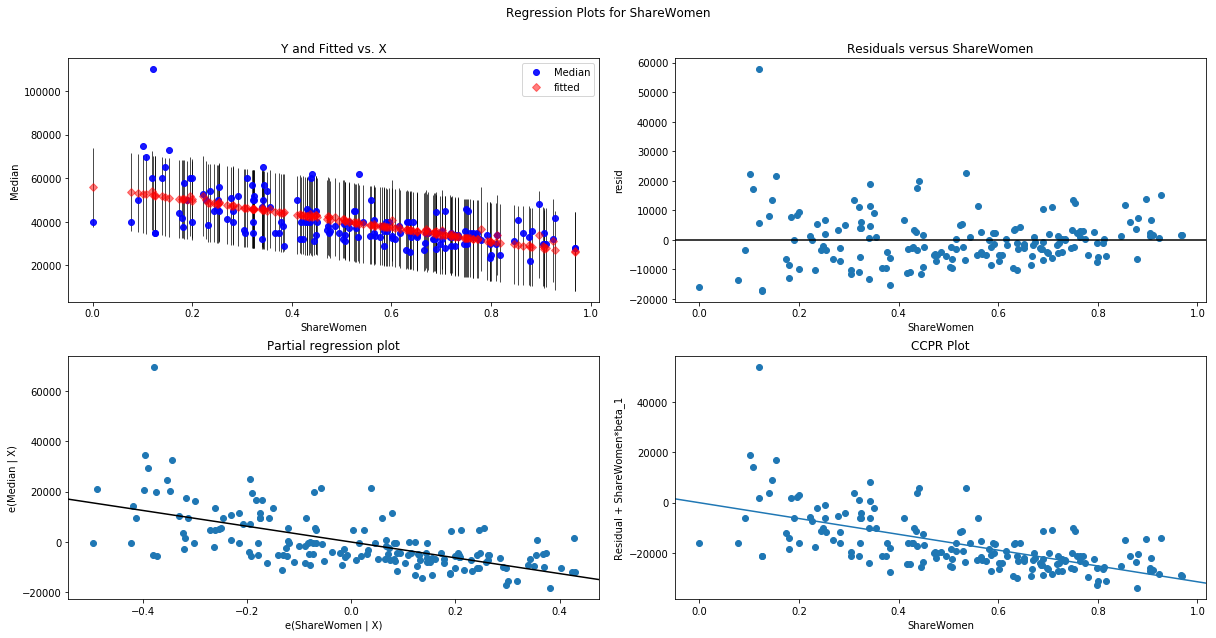

In [14]:
fig = plt.figure(figsize=(17,9))
fig = sm.graphics.plot_regress_exog(model, 'ShareWomen', fig=fig)

In [15]:
results = smf.ols('Median ~ College_jobs', data=data3).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Median   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3773
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.540
Time:                        21:19:04   Log-Likelihood:                -1851.0
No. Observations:                 172   AIC:                             3706.
Df Residuals:                     170   BIC:                             3712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.039e+04   1013.019     39.871      0.000    3.84e+04    4.24e+04
College_jobs    -0.0253      0.041     -0.614      0.540      -0.106       0.056
==============================================================================
Omnibus:                       94.209   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.545
Skew:                           2.030   Prob(JB):                    3.06e-112
Kurtosis:                      10.428   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

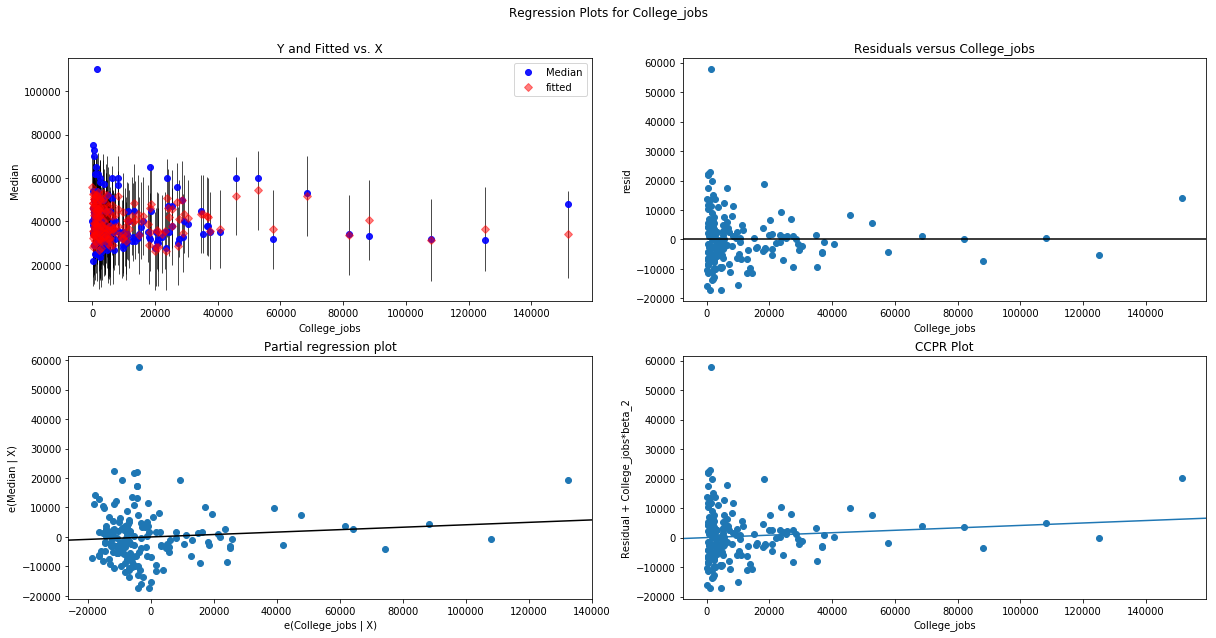

In [16]:
fig = plt.figure(figsize=(17,9))
fig = sm.graphics.plot_regress_exog(model, 'College_jobs', fig=fig)

# Interpretation & diagnostics

## What do the results mean? Interpret the coefficient, p-values, and confidence intervals for each coefficient (you don’t have to do the intercept), and the Rˆ2 and Adj. Rˆ2 (if relevant), and prof(F) for the whole model.

- coefficient for ShareWomen=-3.142e+04, meaning when ShareWomen increases by 1unit, Median decreases by $31420.
- coeff for college jobs = 0.04, meaning when college jobs increses by 1 unit, Median increases by 0.04.
- p-value for ShareWomen=0, rejecting the null hypothesis at a 95% confidence threshold. However, the p value for college jobs is 0.212. Thus, we cannot reject the null hypothesis.
- If we repeat the analysis with other samples, 95% of the time [-3.74e+04 ~ -2.54e+04] will capture the true value for shareWomen coefficient. Similarly, [-0.024 ~ 0.106] for college jobs coefficient.
- Rˆ2 = 0.388, adj Rˆ2 = 0.381. As a whole, this model captures 38.8% of the variance of the median. When adding college jobs, Rˆ2 value decreased to 0.383; adding variable did not increase the explanatory power of the model. R^2 and adj R^2 value for ShareWomen and college jobs are different. The possible reason is that the datasets are discrete. 

## Which hypotheses do you reject and fail to reject, and why?


Prob F is a probability the null hypothesis in the model cannot be rejected. In this case, 8.97e- 19. Since it is small, we can say that the independent variables affect Median.

## Does this model satisfy the major assumptions of OLS regression? Evaluate your model according to each one.

- The sample size is more than 20 or 30. Compare to the sample size, there is little outliers. However, if we remove it, the coefficient for ShareWomen might decrease slightly.
- Scatter plot for median and ShareWomen is linear. For college jobs, it is hard to say that the plot is linear.
- Since adding variable has little change to the coefficients, there is little multicollinearity. Prob F for median & college jobs was relatively large, thus we can drop the college jobs in the equation.
- Heteroscedasticity occurs for college jobs (fan shape). ShareWomen is homoscedastic.
- No autocorrelation since the data is not dealing with time series.

# Conclusions

## What biases might be present in the sample itself that could be affecting this outcome?

- Response bias: The data is self-reported through American Community survey.
- Selection bias: Access to the survey is not clear.
- Information bias: random error might occur when putting data.
- Invisibility bias: List of majors and major categories are from Carnevale et al, "What’s It Worth?: The Economic Value of College Majors." Thus, some majors may be missing.

## Overall, are you confident in your findings? Why or why not? What might improve this analysis? (This can be about anythign from the original data, bias, and/or results and diagnostics.)

I am not confident with the result since the original data aggregates and rounds individual data. However, assuming the data is reliable, I am confident that there is a weak negative relationship between women ratio and earnings. At the same time, I am not confident with the result from testing college jobs and median. Having more college degree jobs does not increase earnings significantly, and Rˆ2 value was low. I can improve the analysis by adding more majors and increasing the sample size. For further study, analyzing with different independent variables or data from a different organization can be done.